# 数据收集

In [7]:
import pandas as pd
import numpy as np
import requests 
import os 
import glob
import json

In [8]:
#把twitter_archive_enhanced文件加载到df1数据集中。
df1=pd.read_csv('twitter-archive-enhanced.csv') 


In [24]:
#创建文件夹image_predicted
folder_name='image_predicted'    
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#把图像预测数据下载到images_predicted.tsv文件中
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
reponse=requests.get(url)
with open(os.path.join(folder_name,'images_predicted.tsv'),mode='wb')as file:
    file.write(reponse.content)
    

In [9]:
 #df2为推特图像的预测数据集。
df2=pd.read_csv('images_predicted.tsv',sep='\t')

In [10]:
#从API获得的数据中提取twitter_id,retweet_count,favorite_count生成df3数据集。
df_list=[]
f_txt=open('tweet_json.txt')
for i in f_txt.readlines():
    parsed_json=json.loads(i)  #txt转换成json
    
    twitter_id=parsed_json['id']
    retweet_count=parsed_json['retweet_count']
    favorite_count=parsed_json['favorite_count']
    df_list.append({'tweet_id':twitter_id,
                        'retweets_count':retweet_count,
                        'favorites_count':favorite_count})
    
df3=pd.DataFrame(df_list)

# 评估

In [11]:
#设置每列宽度
pd.set_option('max_colwidth',200)

In [7]:
df1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [8]:
df2

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [9]:
df3

favorites_count  retweets_count            tweet_id
0               39492            8842  892420643555336193
1               33786            6480  892177421306343426
2               25445            4301  891815181378084864
3               42863            8925  891689557279858688
4               41016            9721  891327558926688256
5               20548            3240  891087950875897856
6               12053            2142  890971913173991426
7               66596           19548  890729181411237888
8               28187            4403  890609185150312448
9               32467            7684  890240255349198849
10              31127            7584  890006608113172480
11              28208            5116  889880896479866881
12              38745            8502  889665388333682689
13              27633            4705  889638837579907072
14              15329            2309  889531135344209921
15              25712            5635  889278841981685760
16              29555            4681  888917238123831296
17              26021            4535  888804989199671297
18              20267            3722  888554962724278272
19              22144            3637  888078434458587136
20              30690            5584  887705289381826560
21              46940           12053  887517139158093824
22              70007           18813  887473957103951883
23              34223           10713  887343217045368832
24              31045            6147  887101392804085760
25              35786            8045  886983233522544640
26              12286            3420  886736880519319552
27              22802            4597  886680336477933568
28              21488            3297  886366144734445568
29              28437            6506  886258384151887873
...               ...             ...                 ...
2321              457             337  666411507551481857
2322              113              43  666407126856765440
2323              171              91  666396247373291520
2324              194              99  666373753744588802
2325              801             590  666362758909284353
2326              228              76  666353288456101888
2327              308             146  666345417576210432
2328              203              96  666337882303524864
2329              519             365  666293911632134144
2330              152              71  666287406224695296
2331              183              81  666273097616637952
2332              108              37  666268910803644416
2333            14703            6835  666104133288665088
2334               81              15  666102155909144576
2335              160              73  666099513787052032
2336              168              78  666094000022159362
2337              121              47  666082916733198337
2338              334             173  666073100786774016
2339              154              67  666071193221509120
2340              494             230  666063827256086533
2341              117              61  666058600524156928
2342              304             146  666057090499244032
2343              449             261  666055525042405380
2344             1250             877  666051853826850816
2345              136              60  666050758794694657
2346              111              41  666049248165822465
2347              309             147  666044226329800704
2348              128              47  666033412701032449
2349              132              48  666029285002620928
2350             2528             530  666020888022790149

[2351 rows x 3 columns]

In [12]:
df1.info(),df2.info(),df3.info()  #查看数据集总体情况 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(None, None, None)

In [32]:
df1.name.duplicated().sum(),df1.name[df1.name=='None'].count()   #发现df1中总共2356行，name列中有1399行重复,name为None的就有745行

(1399, 745)

In [12]:
all_columns=pd.Series(list(df1)+list(df2)+list(df3))       #查看三个数据集中列名是否重复,第17、31个列名与前一个tweet_id重复
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

In [15]:
df1.tweet_id.duplicated().sum()

0

In [16]:
df2.jpg_url.duplicated().sum()

66

### 质量问题

####  df1
    1.包含了没有图片或非原始评级的推特。
    2.timestamp列的数据类型错误。
    3.tweet_id数据类型错误，应该是字符串类型，而不是整型。
    4.狗狗的名字中有一半为None和a,an,the等无效字符串。
    5.狗狗的评分列没有计算出来，且分子分母异常：有的分子是小数但只取了小数点后面的数字、分子分母没简化、分子分母取值异常。
    6.太多无用的空值列。

####  df2
    1.df2数据集中jpg_url列中有重复。
    
#### d3
    1.df3中favourite_count列有的行数据为零。
### 整洁问题
     1.df1中doggo,floofer,pupper,puppo四列可以变成一列stage。
     2.三个数据片段都是以 tweet_id 为观察单元，应该在同一表中。
    

# 清理

In [13]:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

### 缺失数据

####  `df1`:狗狗的评分列没有计算出来，且分子分母异常：有的分子是小数但只取了小数点后面的数字、分子分母没简化、分子分母取值位置错误。

##### 定义

使用 .str.extract 和正则表达式，从 text列中重新提取评分，来完成评分的清理。
    

##### 代码

In [55]:
#利用更加精准的正则表达式解决了只取小数和分子分母取错位置的问题。
df1_clean['rating_numerator']=df1_clean.text.str.extract(r'([0-9]+\.?\d?\d?)/10',expand=True)
df1_clean['rating_denominator']=df1_clean.text.str.extract(r'[0-9][0-9]?/([0-9][0-9][0-9]?)',expand=True)

In [56]:
#把评分的分子分母转换成float类型
df1_clean.rating_denominator=df1_clean.rating_denominator.astype(float)
df1_clean.rating_numerator=df1_clean.rating_numerator.astype(float)

In [57]:
#删除分母为空的行，这种是没有给出实际评分的，应该删除。
df1_clean=df1_clean.dropna(subset=['rating_denominator'])      #限定rating_denominator列

In [58]:
#计算出评分列
df1_clean['grade']=df1_clean.rating_numerator/df1_clean.rating_denominator

##### 测试

In [8]:
df1_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

####  `df1`：狗狗的名字中有一半为None和a,an,the等无效字符串。

##### 定义  
    none不是有效值，为了标识缺失值，将所有的无效的名字用 np.nan 来替代。
    
##### 代码

In [14]:
for i in range(len(df1_clean)):
    if(df1_clean.name[i]=='None'):
        df1_clean.name[i]=np.nan

D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### 测试

In [15]:
df1_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

### 清洁度

#### df1中doggo,floofer,pupper,puppo四列可以变成一列stage。

#### 定义
    将四列中的 'None' 替换为空字符串 ''，然后将四列做向量加法，连接到一起组成stage。
    
#### 代码

In [60]:
df1_clean.doggo=df1_clean.doggo.str.replace('None','')
df1_clean.floofer=df1_clean.floofer.str.replace('None','')
df1_clean.pupper=df1_clean.pupper.str.replace('None','')
df1_clean.puppo=df1_clean.puppo.str.replace('None','')

In [61]:
df1_clean['stage']=df1_clean['doggo']+df1_clean['floofer']+df1_clean['pupper']+df1_clean['puppo']
df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

#### 测试

In [49]:
df1_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

#### 三个数据片段都是以 tweet_id 为观察单元，应该在同一表中。
#### 定义
    用merge()函数将三个数据集合并，
#### 代码

In [65]:
#三个数据集合并为df_clean
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id')
df_clean=pd.merge(df1_clean,df2_clean,on='tweet_id',how='inner')

#### 测试

In [67]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888078434458587136                    NaN                  NaN   
20    887705289381826560                    NaN                  NaN   
21    887517139158093824                    NaN                  NaN   
22    887473957103951883                    NaN                  NaN   
23    887343217045368832                    NaN                  NaN   
24    887101392804085760                    NaN                  NaN   
25    886983233522544640                    NaN                  NaN   
26    886736880519319552                    NaN                  NaN   
27    886680336477933568                    NaN                  NaN   
28    886366144734445568                    NaN                  NaN   
29    886258384151887873                    NaN                  NaN   
...                  ...                    ...                  ...   
2042  666411507551481857                    NaN                  NaN   
2043  666407126856765440                    NaN                  NaN   
2044  666396247373291520                    NaN                  NaN   
2045  666373753744588802                    NaN                  NaN   
2046  666362758909284353                    NaN                  NaN   
2047  666353288456101888                    NaN                  NaN   
2048  666345417576210432                    NaN                  NaN   
2049  666337882303524864                    NaN                  NaN   
2050  666293911632134144                    NaN                  NaN   
2051  666287406224695296                    NaN                  NaN   
2052  666273097616637952                    NaN                  NaN   
2053  666268910803644416                    NaN                  NaN   
2054  666104133288665088                    NaN                  NaN   
2055  666102155909144576                    NaN                  NaN   
2056  666099513787052032                    NaN                  NaN   
2057  666094000022159362                    NaN                  NaN   
2058  666082916733198337                    NaN                  NaN   
2059  666073100786774016                    NaN                  NaN   
2060  666071193221509120                    NaN                  NaN   
2061  666063827256086533                    NaN                  NaN   
2062  666058600524156928                    NaN                  NaN   
2063  666057090499244032                    NaN                  NaN   
2064  666055525042405380                    NaN                  NaN   
2065  666051853826850816                    NaN         

### 质量

#### `df1`:timestamp列的数据类型错误.

#### 定义
    timestamp应该是时间数据类型，而不是对象，用pd.to_datatime()函数转换。

#### 代码

In [68]:
df_clean.timestamp=pd.to_datetime(df_clean.timestamp)

#### 测试

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
grade                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 239.4+ KB


#### `df1`:tweet_id数据类型错误，应该是字符串类型，而不是整型。

#### 定义
    用astype()函数把tweet_id列数据类型转换成字符串类型。
    
#### 代码

In [69]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

#### 测试

In [70]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888078434458587136                    NaN                  NaN   
20    887705289381826560                    NaN                  NaN   
21    887517139158093824                    NaN                  NaN   
22    887473957103951883                    NaN                  NaN   
23    887343217045368832                    NaN                  NaN   
24    887101392804085760                    NaN                  NaN   
25    886983233522544640                    NaN                  NaN   
26    886736880519319552                    NaN                  NaN   
27    886680336477933568                    NaN                  NaN   
28    886366144734445568                    NaN                  NaN   
29    886258384151887873                    NaN                  NaN   
...                  ...                    ...                  ...   
2042  666411507551481857                    NaN                  NaN   
2043  666407126856765440                    NaN                  NaN   
2044  666396247373291520                    NaN                  NaN   
2045  666373753744588802                    NaN                  NaN   
2046  666362758909284353                    NaN                  NaN   
2047  666353288456101888                    NaN                  NaN   
2048  666345417576210432                    NaN                  NaN   
2049  666337882303524864                    NaN                  NaN   
2050  666293911632134144                    NaN                  NaN   
2051  666287406224695296                    NaN                  NaN   
2052  666273097616637952                    NaN                  NaN   
2053  666268910803644416                    NaN                  NaN   
2054  666104133288665088                    NaN                  NaN   
2055  666102155909144576                    NaN                  NaN   
2056  666099513787052032                    NaN                  NaN   
2057  666094000022159362                    NaN                  NaN   
2058  666082916733198337                    NaN                  NaN   
2059  666073100786774016                    NaN                  NaN   
2060  666071193221509120                    NaN                  NaN   
2061  666063827256086533                    NaN                  NaN   
2062  666058600524156928                    NaN                  NaN   
2063  666057090499244032                    NaN                  NaN   
2064  666055525042405380                    NaN                  NaN   
2065  666051853826850816                    NaN         

#### 包含了没有图片或非原始评级的推特;  df2数据集中jpg_url列中有重复 ;  df3中favourite_count列有的行数据为零。

#### 定义
    选出retweeted_status_id,retweeted_status_user_id和retweeted_status_timestamp这三列为空值的行就可以删除所有转发条目；
    无图片的推特需要删除，对图片预测数据集进行 merge 时选择 inner 方式，这样可以删掉没有图片的推文条目；
#### 代码

In [90]:
#删除转发的推特
df_clean=df_clean[pd.isnull(df_clean.retweeted_status_id)]
df_clean=df_clean[pd.isnull(df_clean.retweeted_status_user_id)]
df_clean=df_clean[pd.isnull(df_clean.retweeted_status_timestamp)]
#删除无图片的推特
#之前 df_clean=pd.merge(df1_clean,df2_clean,on='tweet_id',how='inner')，就已经完成删除过程。

#### 测试

In [91]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888078434458587136                    NaN                  NaN   
20    887705289381826560                    NaN                  NaN   
21    887517139158093824                    NaN                  NaN   
22    887473957103951883                    NaN                  NaN   
23    887343217045368832                    NaN                  NaN   
24    887101392804085760                    NaN                  NaN   
25    886983233522544640                    NaN                  NaN   
26    886736880519319552                    NaN                  NaN   
27    886680336477933568                    NaN                  NaN   
28    886366144734445568                    NaN                  NaN   
29    886258384151887873                    NaN                  NaN   
...                  ...                    ...                  ...   
2042  666411507551481857                    NaN                  NaN   
2043  666407126856765440                    NaN                  NaN   
2044  666396247373291520                    NaN                  NaN   
2045  666373753744588802                    NaN                  NaN   
2046  666362758909284353                    NaN                  NaN   
2047  666353288456101888                    NaN                  NaN   
2048  666345417576210432                    NaN                  NaN   
2049  666337882303524864                    NaN                  NaN   
2050  666293911632134144                    NaN                  NaN   
2051  666287406224695296                    NaN                  NaN   
2052  666273097616637952                    NaN                  NaN   
2053  666268910803644416                    NaN                  NaN   
2054  666104133288665088                    NaN                  NaN   
2055  666102155909144576                    NaN                  NaN   
2056  666099513787052032                    NaN                  NaN   
2057  666094000022159362                    NaN                  NaN   
2058  666082916733198337                    NaN                  NaN   
2059  666073100786774016                    NaN                  NaN   
2060  666071193221509120                    NaN                  NaN   
2061  666063827256086533                    NaN                  NaN   
2062  666058600524156928                    NaN                  NaN   
2063  666057090499244032                    NaN                  NaN   
2064  666055525042405380                    NaN                  NaN   
2065  666051853826850816                    NaN         

#### df2数据集中jpg_url列中有重复；df3中favoritse_count列有的行数据为零
#### 定义
    删除转发的推特后，这些问题也相应的解决了。
    

#### 测试

In [96]:
#jpg_url列无重复值
df_clean.jpg_url.duplicated().sum()
#favorites_count列也没有值为零的行了
(df_clean.favorites_count==0).sum()

0

#### 太多无用的列。
#### 定义
    这些列可以直接删除
    
#### 代码

In [106]:
df_clean=df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### 测试

In [107]:
df_clean

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
19    888078434458587136 2017-07-20 16:49:33   
20    887705289381826560 2017-07-19 16:06:48   
21    887517139158093824 2017-07-19 03:39:09   
22    887473957103951883 2017-07-19 00:47:34   
23    887343217045368832 2017-07-18 16:08:03   
24    887101392804085760 2017-07-18 00:07:08   
25    886983233522544640 2017-07-17 16:17:36   
26    886736880519319552 2017-07-16 23:58:41   
27    886680336477933568 2017-07-16 20:14:00   
28    886366144734445568 2017-07-15 23:25:31   
29    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
2042  666411507551481857 2015-11-17 00:24:19   
2043  666407126856765440 2015-11-17 00:06:54   
2044  666396247373291520 2015-11-16 23:23:41   
2045  666373753744588802 2015-11-16 21:54:18   
2046  666362758909284353 2015-11-16 21:10:36   
2047  666353288456101888 2015-11-16 20:32:58   
2048  666345417576210432 2015-11-16 20:01:42   
2049  666337882303524864 2015-11-16 19:31:45   
2050  666293911632134144 2015-11-16 16:37:02   
2051  666287406224695296 2015-11-16 16:11:11   
2052  666273097616637952 2015-11-16 15:14:19   
2053  666268910803644416 2015-11-16 14:57:41   
2054  666104133288665088 2015-11-16 04:02:55   
2055  666102155909144576 2015-11-16 03:55:04   
2056  666099513787052032 2015-11-16 03:44:34   
2057  666094000022159362 2015-11-16 03:22:39   
2058  666082916733198337 2015-11-16 02:38:37   
2059  666073100786774016 2015-11-16 01:59:36   
2060  666071193221509120 2015-11-16 01:52:02   
2061  666063827256086533 2015-11-16 01:22:45   
2062  666058600524156928 2015-11-16 01:01:59   
2063  666057090499244032 2015-11-16 00:55:59   
2064  666055525042405380 2015-11-16 00:49:46   
2065  666051853826850816 2015-11-16 00:35:11   
2066  666050758794694657 2015-11-16 00:30:50   
2067  666049248165822465 2015-11-16 00:24:50   
2068  666044226329800704 2015-11-16 00:04:52   
2069  666033412701032449 2015-11-15 23:21:54   
2070  666029285002620928 2015-11-15 23:05:30   
2071  666020888022790149 2015-11-15 22:32:08   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
6     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
7     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
9     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
10    <a href="http://twitt

## 存储、分析和可视化

In [108]:
#将评估、清理过的df数据集保存到twitter_archive_mastercsv文件中。
df_clean.to_csv('twitter_archive_master.csv')

### 可视化

>说明：通过从推特主的text生成词云图可以一眼看出狗狗哪种的地位多、对狗狗的大多数评价是哪几个词；

In [98]:
#加载词云库wordcloud和画图matplatlib.pyplot库
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [99]:
#把df1_clean中的text列经过清洗后，每行以字符串形式转存到f_list数组中
f_list=[]
df1_clean1=df_clean.text.reset_index(drop=True)
for i in range(len(df1_clean1)):
    f_list.append(df1_clean1[i].replace('http','.')) #把会干扰词云图且无关紧要的'http'去除。
f_list
#把f_list数组，放入df1_text.txt文本中。
file_name=open('df_text.txt',mode='w',encoding='utf-8')
file_name.writelines(f_list)

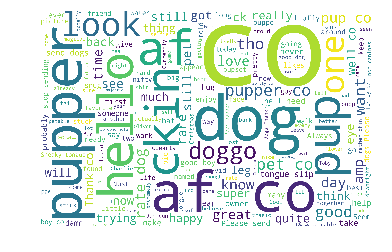

In [101]:
f= open(u'df_text.txt','r',encoding='utf-8').read()
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=3000,              #设置图片的宽度
        height=1960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(f)
# 绘制图片
plt.imshow(wordcloud)
# 消除坐标轴
plt.axis("off")
# 展示图片
plt.show()
wordcloud.to_file('my_test2.png') #将词云图存到my_test2.png文件中。


>结论：可以看出 pupper与doggo这两种地位狗狗占的数量较多；对狗狗的评价关键词是：hello、great、dog；

### 分析

  `1  四种狗狗的地位，那种地位更被人们所喜欢？`

In [119]:
#转发数加上喜欢数的均值
df_clean.groupby(df_clean.stage).mean()['favorites_count']+df_clean.groupby(df_clean.stage).mean()['retweets_count']

stage
                11105.671014
doggo           26372.571429
doggofloofer    20539.000000
doggopupper     16546.222222
doggopuppo      66797.000000
floofer         18091.857143
pupper           9528.443350
puppo           27940.500000
dtype: float64

>推论：从四种地位的狗狗被喜欢、转发的数量均值可以看出狗狗的地位受欢迎率 doddo> puppo >floofer > pupper

`2   参与图片预测的狗狗图片，哪几种品种的狗狗数量最多？`

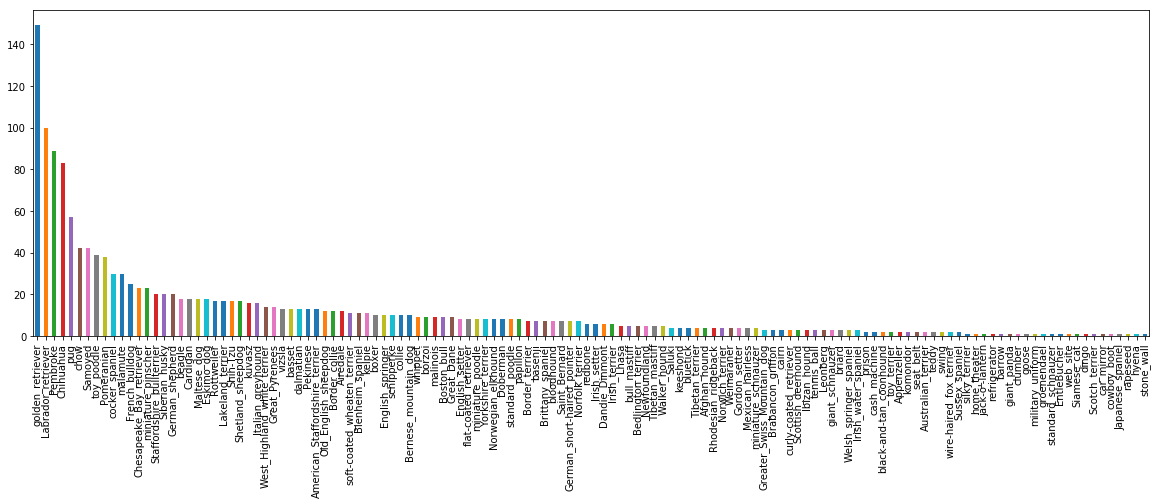

In [10]:
%matplotlib inline
df2_clean.p1.value_counts().plot(kind='bar',figsize=(20,6))


In [74]:
df2_clean.p1.value_counts()[:5]

golden_retriever      149
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

>推论：参与预测的狗狗图片中，品种数量最多分别为golden_retriever(金毛)、Labrador_retriever(拉布拉多)、Pembroke(彭布罗克柯基犬)、Chihuahua(吉娃娃)、pug(哈巴狗)

`3   WeRateDogs的评分大概是在什么水平左右？`

In [120]:
df_clean.grade.mean()

1.1644774448166653

>大概在1.1645水平上，也就是11.6/10